# Data Preparation

## Numeric features scaling

* 숫자 특성을 적절하게 조정하고 계수를 비교 및 해석할 뿐만 아니라 비정상적이거나 누락된 값 또는 희소 행렬 처리를 더 쉽게 할 수 있다.  
　  
* 회귀모델에 의해 허용되고 정확하게 예측될 수 있게 하기 위해 정성적 특성을 숫자값으로 변환한다.  
　  
* 데이터의 비선형 관계를 선형 관계로 변환할 수 있는 가장 현명한 방법으로 숫자 특성을 변환한다.  
　  
* 중요한 데이터가 누락될 경우 대체 데이터를 예측하거나 회귀를 통해 자체적으로 최상의 솔루션을 관리하게 하기 위해 수행할 작업을 결정한다.  
　  
* 데이터의 비정상적이거나 이상한 값을 복구하고 회귀모델을 항상 정상적으로 작동하게 만든다.

### Preparation of data  
* 누락된 값을 적극적으로 처리한다.  
* 누락된 값에 대해 소극적으로 대처한다.  
    - 시스템이 오류를 발생시키고 모든 작업이 중단된다. 문제가 해결될 때까지 중단된 상태를 유지한다.
    - 시스템이 누락된 데이터를 무시하고 누락되지 않은 값을 계산한다.

실제로 편향계수는 예측 변수의 상황이 어떻든 항상 존재하게 된다. 이때 모든 X가 누락된 것과 같은 극단의 경우에도 변수를 표준화하면 0이 된다. 이를 실제로 한번 테스트해보고 여러 최적화기술을 사용해 누락된 값을 고정하기 위해 ** 예측변수를 조정하는 방법과 변칙적인 값을 쉽게 감지 할 수 있는 방법을 알아보자.**  
마크다운 문법`<u> </u>` 안먹힘... 쓰지마세여...

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.datasets import load_boston
from sklearn import linear_model

In [63]:
%matplotlib inline
np.set_printoptions(precision=5, suppress=True) # 소수점 출력을 5자리 숫자로 설정한다

보스턴 데이터 셋 다시 로드

In [64]:
boston = load_boston() 
dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
dataset['target'] = boston.target
observations = len(dataset)
variables = dataset.columns[:-1]
X = dataset.iloc[:,:-1]
y = dataset['target'].values

로지스틱 회귀에 대해서 테스토 하고자 하기때문에 25이상의 모든 값에 대해 목표변수를 이진 응답으로 변환한다.

In [65]:
yq = np.array(y>25, dtype=int)

## Numeric features scaling

함수 StandardScalar와 MinMaxScalar를 사용한다. 두가지 전부 파라미터를 기록하고 저장하는 fit메소드를 갖는다.  
StandardScalar 클래스 : 평균이 0과 표준편차가 1이 되도록 변환  
MinMaxScaler 클래스 : 최대값이 각각 1, 최소값이 0 되도록 변환

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
linear_regression = linear_model.LinearRegression(normalize=False, fit_intercept=True)
linear_regression.fit(X,y)
print ("coefficients: %s\nintercept: %0.3f" % (linear_regression.coef_,linear_regression.intercept_))

coefficients: [ -0.10801   0.04642   0.02056   2.68673 -17.76661   3.80987   0.00069
  -1.47557   0.30605  -0.01233  -0.95275   0.00931  -0.52476]
intercept: 36.459


In [67]:
dataset.min()

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
target       5.00000
dtype: float64

![캡처](img5/캡처.PNG)

(1) StandardScaler  

각 feature의 평균을 0, 분산을 1로 변경합니다. 모든 특성들이 같은 스케일을 갖게 됩니다.  



(2) RobustScaler  

모든 특성들이 같은 크기를 갖는다는 점에서 StandardScaler와 비슷하지만, 평균과 분산 대신 median과 quartile을 사용합니다. RobustScaler는 이상치에 영향을 받지 않습니다.  



(3) MinMaxScaler  

모든 feature가 0과 1사이에 위치하게 만듭니다.  

데이터가 2차원 셋일 경우, 모든 데이터는 x축의 0과 1 사이에, y축의 0과 1사이에 위치하게 됩니다.  



(4) Normalizer  

StandardScaler, RobustScaler, MinMaxScaler가 각 columns의 통계치를 이용한다면 Normalizer는 row마다 각각 정규화됩니다. Normalizer는 유클리드 거리가 1이 되도록 데이터를 조정합니다. (유클리드 거리는 두 점 사이의 거리를 계산할 때 쓰는 방법, L2 Distance)  

### Mean Centering

첫 번째 조정 작업에서 변수를 중심에 놓고 진행해보자.

In [68]:
centering = StandardScaler(with_mean=True, with_std=False)
linear_regression.fit(centering.fit_transform(X),y)
print ("coefficients: %s\nintercept: %0.3f" % (linear_regression.coef_,linear_regression.intercept_))

coefficients: [ -0.10801   0.04642   0.02056   2.68673 -17.76661   3.80987   0.00069
  -1.47557   0.30605  -0.01233  -0.95275   0.00931  -0.52476]
intercept: 22.533


In [69]:
print('mean: %0.3f' % np.mean(y))

mean: 22.533


### Standardization

단위 분산에 맞게 모든 것을 조정하고 결과 확인

In [70]:
standardization = StandardScaler(with_mean=True, with_std=True)
linear_regression.fit(standardization.fit_transform(X),y)
print ("coefficients: %s\nintercept: %0.3f" % (linear_regression.coef_,linear_regression.intercept_))

coefficients: [-0.92815  1.08157  0.1409   0.68174 -2.05672  2.67423  0.01947 -3.10404
  2.66222 -2.07678 -2.06061  0.84927 -3.74363]
intercept: 22.533


### Normalization

In [71]:
scaling  = MinMaxScaler(feature_range=(0, 1))
linear_regression.fit(scaling.fit_transform(X),y)
print ("coefficients: %s\nintercept: %0.3f" % (linear_regression.coef_,linear_regression.intercept_))

coefficients: [ -9.60976   4.64205   0.56084   2.68673  -8.63457  19.88369   0.06722
 -16.22666   7.03914  -6.46333  -8.95582   3.69283 -19.01724]
intercept: 26.620


### The logistic regression case

In [72]:
import statsmodels.api as sm
Xq = sm.add_constant(standardization.fit_transform(X))
logit = sm.Logit(yq,Xq)
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.206631
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  506
Model:                          Logit   Df Residuals:                      492
Method:                           MLE   Df Model:                           13
Date:                Thu, 13 Aug 2020   Pseudo R-squ.:                  0.6289
Time:                        18:25:26   Log-Likelihood:                -104.56
converged:                       True   LL-Null:                       -281.76
Covariance Type:            nonrobust   LLR p-value:                 9.145e-68
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0542      0.356     -8.571      0.000      -3.753      -2.356
x1            -0.0954      0.

로지스틱회귀에서 예측변수의 단위 변화는 계수 자체의 지수에 해당하는 양의 응답 오즈비를 변경한다.

In [73]:
print('odd ratios of coefficients : %s' % np.exp(result.params))

odd ratios of coefficients : [ 0.04716  0.90902  1.28964  0.46908  1.27788  0.45278  3.76007  1.10314
  0.28965 15.90341  0.16158  0.46603  0.81345  0.07275]


[오즈비 및 Signoid 설명](https://www.notion.so/Activation-Sigmoid-a866210cc04d488b8c96e09c9ee49228)

In [74]:
def sigmoid(p):
    return 1 / (1+np.exp(-p))
print('intercept: %0.3f'%result.params[0])
print('probability of value above 25 when all predictors are average : %0.3f' %sigmoid(result.params[0]))

intercept: -3.054
probability of value above 25 when all predictors are average : 0.045


시그모이드 함수를 사용해 절편을 확률로 변환하면 값 0.045를 얻을 수 있다. 이 값은 예측변수가 평균값을 가질 때 주택 가격이 25보다 클확률이다

In [75]:
print ('average likelihood of positive response: %0.3f' % (sum(yq) / float(len(yq))))

average likelihood of positive response: 0.245


In [76]:
C = np.ones(len(X))
logit = sm.Logit(yq, C)
result = logit.fit()
print (result.summary())
print ('\nprobability of value above 25 using just a constant: %0.3f' % sigmoid(result.params[0]))

Optimization terminated successfully.
         Current function value: 0.556842
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  506
Model:                          Logit   Df Residuals:                      505
Method:                           MLE   Df Model:                            0
Date:                Thu, 13 Aug 2020   Pseudo R-squ.:               3.276e-11
Time:                        18:25:26   Log-Likelihood:                -281.76
converged:                       True   LL-Null:                       -281.76
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1251      0.103    -10.886      0.000      -1.328      -0.923

probability of value above 2

여기서 추출한 것은 특정 확률을 통해 추출 한 것이다.

## Qualitative features encoding

지금까지 정성적 변수를 이용하여 데이터를 분석하였다. 하지만 데이터에는 정성적 조건을 안가지고 있을 수도 있다. 이를 정성적인 변환하여 데이터셋을 활용하여 보자.

In [77]:
outlook     = ['sunny', 'overcast', 'rainy']
temperature = ['hot', 'mild', 'cool']
humidity    = ['high', 'normal']
windy       = ['TRUE', 'FALSE']

weather_dataset = list()

for o in outlook:
    for t in temperature:
        for h in humidity:
            for w in windy:
                weather_dataset.append([o,t,h,w])

play = [0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1]

1대 1 데이터 셋 설정

### Dummy coding

일련의 정성적 변수를 이진변수로 변환하는 가장 빠른 방법은 pandas를 사용하는 것이다.

In [78]:
import pandas as pd
df = pd.DataFrame(weather_dataset, columns=['outlook', 'temperature', 'humidity', 'windy'])

In [79]:
df

,outlook,temperature,humidity,windy
0,sunny,hot,high,TRUE
1,sunny,hot,high,FALSE
2,sunny,hot,normal,TRUE
3,sunny,hot,normal,FALSE
4,sunny,mild,high,TRUE
5,sunny,mild,high,FALSE
6,sunny,mild,normal,TRUE
7,sunny,mild,normal,FALSE
8,sunny,cool,high,TRUE
9,sunny,cool,high,FALSE


In [80]:
display(pd.get_dummies(df.outlook).iloc[:8,:])

,overcast,rainy,sunny
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
5,0,0,1
6,0,0,1
7,0,0,1


`get_dummies(df)` 데이터들을 이진분류로 나누어줌

In [81]:
dummy_encoding = pd.get_dummies(df)

`statsmodels.api`를 황용해 상관계수 구하고 분석 시작!

In [82]:
import statsmodels.api as sm
X = sm.add_constant(dummy_encoding)
logit = sm.Logit(play, X)
result = logit.fit()
print (result.summary())

Optimization terminated successfully.
         Current function value: 0.292346
         Iterations 28
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   36
Model:                          Logit   Df Residuals:                       29
Method:                           MLE   Df Model:                            6
Date:                Thu, 13 Aug 2020   Pseudo R-squ.:                  0.5744
Time:                        18:25:26   Log-Likelihood:                -10.524
converged:                       True   LL-Null:                       -24.731
Covariance Type:            nonrobust   LLR p-value:                 7.856e-05
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2393    4.3e+07   5.57e-09      1.000   -8.42e+07    8.42e+07
outlook_ov

완벽한 공선성을 안좋아하는 경우도 있어 이진변수 집합에서 선택한 수준만 삭제하기만 하면 된다. 그렇게 되면 제거된 계수는 절편으로 통합되고 회귀모델은 다른변수와 계수를 사용해 이전처럼 작동할 것이다.

In [83]:
X.drop(['outlook_sunny', 'temperature_mild', 'humidity_normal', 'windy_FALSE'], inplace=True, axis=1)
logit = sm.Logit(play, X)
result = logit.fit()
print (result.summary())

Optimization terminated successfully.
         Current function value: 0.292346
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   36
Model:                          Logit   Df Residuals:                       29
Method:                           MLE   Df Model:                            6
Date:                Thu, 13 Aug 2020   Pseudo R-squ.:                  0.5744
Time:                        18:25:26   Log-Likelihood:                -10.524
converged:                       True   LL-Null:                       -24.731
Covariance Type:            nonrobust   LLR p-value:                 7.856e-05
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.4055      2.196      2.462      0.014       1.102       9.709
outlook_ove

### One-hot encoding

Scikit-learn 패키지에서 정성적 변수를 숫자 변수로 일관되게 변환 하는 방법을 제공한다. 그 중 One-hot encoding을 해보자

In [84]:
from sklearn.feature_extraction import DictVectorizer
vectorizer = DictVectorizer(sparse = False)
dict_representation = [{varname:var for var, varname in zip(row,['outlook', 'temperature', 'humidity', 'windy'])} for row in weather_dataset]
print(dict_representation[0])
print(vectorizer.fit_transform(dict_representation))
vect=vectorzier.fit_transform(dict_representation)

{'outlook': 'sunny', 'temperature': 'hot', 'humidity': 'high', 'windy': 'TRUE'}
[[1. 0. 0. 0. 1. 0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 0. 1. 0. 1. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0. 1. 0. 1. 0.]
 [1. 0. 0. 0. 1. 0. 0. 1. 0. 1.]
 [1. 0. 0. 0. 1. 0. 0. 1. 1. 0.]
 [0. 1. 0. 0. 1. 0. 0. 1. 0. 1.]
 [0. 1. 0. 0. 1. 0. 0. 1. 1. 0.]
 [1. 0. 0. 0. 1. 1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1. 1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 1. 1. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 1. 0. 0. 1. 0.]
 [1. 0. 1. 0. 0. 0. 1. 0. 0. 1.]
 [1. 0. 1. 0. 0. 0. 1. 0. 1. 0.]
 [0. 1. 1. 0. 0. 0. 1. 0. 0. 1.]
 [0. 1. 1. 0. 0. 0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 0. 0. 0. 1. 0. 1.]
 [1. 0. 1. 0. 0. 0. 0. 1. 1. 0.]
 [0. 1. 1. 0. 0. 0. 0. 1. 0. 1.]
 [0. 1. 1. 0. 0. 0. 0. 1. 1. 0.]
 [1. 0. 1. 0. 0. 1. 0. 0. 0. 1.]
 [1. 0. 1. 0. 0. 1. 0. 0. 1. 0.]
 [0. 1. 1. 0. 0. 1. 0. 0. 0. 1.]
 [0. 1. 1. 0. 0. 1. 0. 0. 1. 0.]
 [1. 0. 0. 1. 0. 0. 1. 0. 0. 1.]
 [1. 0. 0. 1. 0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 0. 0. 1. 0. 1. 

NameError: name 'vectorzier' is not defined

DictVectorizer 으로 불러오때 안에서 sort한다음 불러옴 그래서 abc순서대로 됨

In [85]:
print(vectorizer.feature_names_)

['humidity=high', 'humidity=normal', 'outlook=overcast', 'outlook=rainy', 'outlook=sunny', 'temperature=cool', 'temperature=hot', 'temperature=mild', 'windy=FALSE', 'windy=TRUE']


In [86]:
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
label_encoder = LabelEncoder()
print (label_encoder.fit_transform(df.outlook)) # 라벨 값 숫자로 바꾸기

[2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [87]:
label_encoder.inverse_transform([0,1,2])

array(['overcast', 'rainy', 'sunny'], dtype=object)

In [88]:
print (label_encoder.classes_)

['overcast' 'rainy' 'sunny']


In [89]:
label_binarizer = LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)
print (label_binarizer.fit_transform(label_encoder.fit_transform(df.outlook)))

[[0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]]


### Feature Hasher

In [90]:
your_text = '김민철 짱 짱 짱 짱 짱 짱 짱짱 맨 헤헤 재밌다'
mapping_words_in_text = {word:position for position, word in enumerate(set(your_text.lower().split(' ')))} # enumerate() 자료형을 입력으로 받아 인덱스 값을 포함하는 enumerate 객체를 리턴
# set() 집합에 관련된 것을 쉽게 처리하기 위해 만든 자료형 동일한 것은 제외함 중복 허용 x
print (mapping_words_in_text)

{'김민철': 0, '재밌다': 1, '헤헤': 2, '맨': 3, '짱짱': 4, '짱': 5}


In [91]:
corpus = ['The quick fox jumped over the lazy dog', 'I sought a dog wondering around with a bird', 'My dog is named Fido']

In [92]:
from sklearn.feature_extraction.text import CountVectorizer
textual_one_hot_encoder = CountVectorizer(binary=True)
textual_one_hot_encoder.fit(corpus)
vectorized_text = textual_one_hot_encoder.transform(corpus)
print(vectorized_text.todense())#.tondense()를 통해 결과 희소 행렬을 밀도있게 만들어야한다.

[[0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0]
 [1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1]
 [0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0]]


In [93]:
textual_one_hot_encoder.fit(corpus)

CountVectorizer(binary=True)

사전 만들기  
새로운 단어를 만들때 문제가 생긴다.

In [94]:
print (textual_one_hot_encoder.get_feature_names())

['around', 'bird', 'dog', 'fido', 'fox', 'is', 'jumped', 'lazy', 'my', 'named', 'over', 'quick', 'sought', 'the', 'with', 'wondering']


In [95]:
print (textual_one_hot_encoder.transform(['John went home today']).todense())

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


매우 큰 희소 벡터를 정의하고, 해시 함수의 특정 특성을 사용해 결정적으로 벡터 안에 있는 각 단어에 위치를 지정하는 것이다.

In [96]:
from sklearn.feature_extraction.text import HashingVectorizer # 해쉬 함수을 사용하여 적은 메모리와 빠른 속도로 BOW벡터를 만든다.
hashing_trick = HashingVectorizer(n_features=11, binary=True, norm=None, alternate_sign=True) #n_features = 특성 수, 바이너리 : True 이면 0이 아닌 모든 개수가 1로 설정된다.
M = hashing_trick.transform(corpus)
print (M.todense())

[[1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0.]]


In [97]:
print (hashing_trick.transform(['John went home today']).todense())

[[1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


## Numeric features transformation

수치 특성은 목표변수와 관계없이 변환할 수 있다. 

In [98]:
import numpy as np
boston = load_boston()
labels = boston.feature_names
X = boston.data
y = boston.target

In [99]:
linear_regression = linear_model.LinearRegression(fit_intercept=True)
linear_regression.fit(X,y)

LinearRegression()

In [100]:
from sklearn.metrics import r2_score
print("R-squared  %0.3f" % r2_score(y, linear_regression.predict(X)))

R-squared  0.741


## Observing residuals    

차수결정과 모수 추정이 끝난 다음에 모형화가 제대로 이루어졌는지를 검사하는 모형 진단을 실시해야 한다. 선형회귀의 잔차는 항상 평균 0을 가지며, 표준편차는 생성된 오차의 크기에 따라 달라진다.

In [101]:
residuals = y - linear_regression.predict(X)
print ("Head of residual %s" % residuals[:5])
print ("Mean of residuals: %0.3f" % np.mean(residuals))
print ("Standard deviation of residuals: %0.3f" % np.std(residuals))

Head of residual [-6.00384 -3.42556  4.1324   4.79296  8.25648]
Mean of residuals: 0.000
Standard deviation of residuals: 4.679


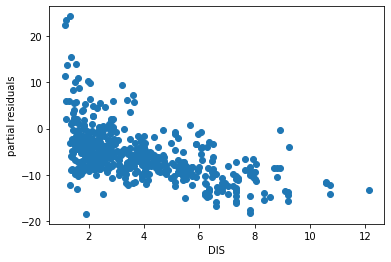

In [102]:
var = 7 # 특정 문제에 대해 부분 잔차 플룻이라고 하는 잔차를 기반으로 한 플롯을 사용하고자 한다.
partial_residual = residuals + X[:, var] * linear_regression.coef_[var]
plt.plot(X[:,var], partial_residual, 'o')
plt.xlabel(boston.feature_names[var])
plt.ylabel('partial residuals')
plt.show()

2이후에 값들이 조금 휘어있다..... 역제곱 변환으로 해결해보자

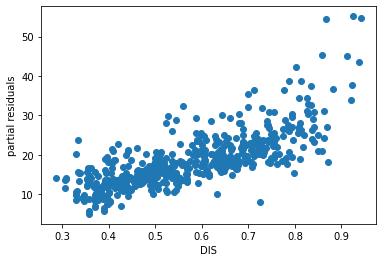

R-squared: 0.769


In [103]:
X_t = X.copy()
X_t[:,var] = 1./np.sqrt(X_t[:,var])
linear_regression.fit(X_t, y)
partial_residual = residuals + X_t[:,var] * linear_regression.coef_[var]
plt.plot(X_t[:,var], partial_residual, 'o')
plt.xlabel(boston.feature_names[var])
plt.ylabel('partial residuals')
plt.show()
print ("R-squared: %0.3f" % r2_score(y, linear_regression.predict(X_t)))

변환 이후 다시 잔차 분석으랗면 직선으로 나타나는 것을 확인 할 수 있다.

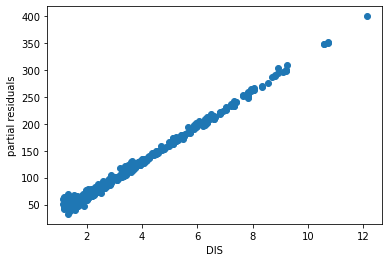

In [104]:
partial_residual = residuals + X[:, var] * linear_regression.coef_[var]
plt.plot(X[:,var], partial_residual, 'o')
plt.xlabel(boston.feature_names[var])
plt.ylabel('partial residuals')
plt.show()

## Binning  
연속형 변수를 범주형 또는 순위형 변수로 변환하는 것이다.  
값을 동일한 간격의 빈으로 나누고 Numpy의 histogram 함수를 사용해 빈의 경계를 확인한다.  
* 이상치로 발생 가능한 문제를 완화 시켜준다.
* 결측치 처리를 보다 간편하게 할 수 있다.
* 과적합을 완화 시켜주는 효과가 있다.
* 결과에 대한 해석이 용이하다는 장점도 있다.
* Target 변수와의 관계가 비선형인 경우도 설명이 가능하다

In [105]:
import numpy as np
from sklearn.preprocessing import LabelBinarizer
LB = LabelBinarizer()
X_t = X.copy()
edges = np.histogram(X_t[:,var], bins=20)[1]
binning = np.digitize(X_t[:,var], edges)
X_t = np.column_stack((np.delete(X_t, var, axis=1),LB.fit_transform(binning)))
linear_regression.fit(X_t, y)
print ("R-squared: %0.3f" % r2_score(y, linear_regression.predict(X_t)))

R-squared: 0.768


R계수 0.741에서 0.768로 상승함

## Missing data


누락 데이터는 실제 데이터에서 자주 나타나기도 하고 때로는 무작위로 임의로 발생하는 경우도 있다. 이를 누락된값을 표시, 찾기, 변화 그리고 슬라이싱을 사용하여 벡터안에 있는 유효한 요소의 평균과 같이 상수보다 더 정교한 것으로 만들어 보자.

In [106]:
example = np.array([1,2,np.nan,6,7])
print (example)

[ 1.  2. nan  6.  7.]


In [107]:
print (np.isnan(example))

[False False  True False False]


In [108]:
print (np.nan_to_num(example))

[1. 2. 0. 6. 7.]


In [109]:
missing = np.isnan(example)
replacing_value = np.mean(example[~missing])
example[missing] = replacing_value
print (example)

[1. 2. 4. 6. 7.]


## Missing data imputation

랜덤으로 nan을 였고 이 것을 누락돼었다고 관찰하고 평균으로 누락 된 값을 대체해보자.

In [110]:
from random import sample, seed
import numpy as np
seed(19)
Xm = X.copy()
missing = sample(range(len(y)), len(y)//4)
Xm[missing,5] = np.nan
print ("Header of Xm[:,5] : %s" % Xm[:10,5])

Header of Xm[:,5] : [6.575   nan 7.185   nan 7.147 6.43  6.012 6.172   nan 6.004]


In [111]:
from sklearn.impute import SimpleImputer
missing = np.isnan(example)
mean = np.mean(example[~missing])
impute = SimpleImputer(missing_values = np.nan, strategy='mean', fill_value = mean) # stategy를 constant로 바꾸면 fill_value값 출력
imputed_X =impute.fit_transform(Xm)
print ("Header of imputed Xm[:,5] : %s" % imputed_X[:,5][:10])


Header of imputed Xm[:,5] : [6.575   6.25446 7.185   6.25446 7.147   6.43    6.012   6.172   6.25446
 6.004  ]


## Keeping trace of missing values

In [112]:
missing_indicator = np.isnan(Xm[:,5]).astype(int)
print ("Header of missing indicator : %s" % missing_indicator[:10])

Header of missing indicator : [0 1 0 1 0 0 0 0 1 0]


# Outliers

이상치 감지해 제거하거나 누락된 사례인 것처럼 그것을 전가해 처리해보자.

In [113]:
boston = load_boston()
dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
labels = boston.feature_names
X = dataset
y = boston.target

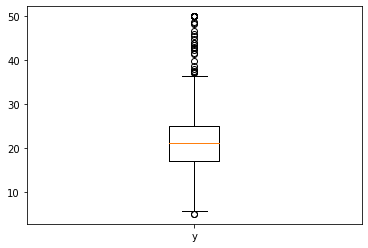

In [114]:
plt.boxplot(y,labels=('y'))
plt.show()

뭔가 위쪽에 후두둑 몰려있는데... 이렇게 나타내니... 어디가 문제인지 잘모르겠다.

평균 제곱근 오차를 사용해 표준화 하여 보자

In [115]:
def standardize(x):
    return (x-np.mean(x))/np.std(x)

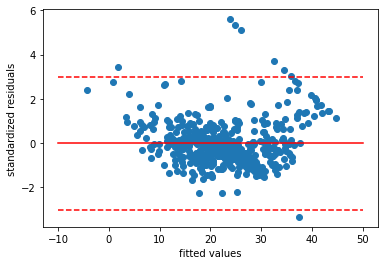

In [116]:
scatter = plt.plot(linear_regression.fit(X,y).predict(X), standardize(residuals), 'o')
plt.plot([-10,50],[0,0], "r-")
plt.plot([-10,50],[3,3], "r--")
plt.plot([-10,50],[-3,-3], "r--")
plt.xlabel('fitted values')
plt.ylabel('standardized residuals')
plt.show()

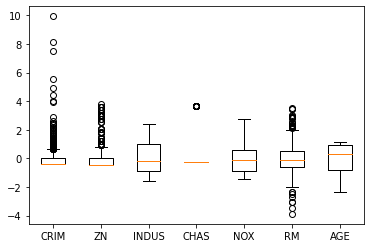

In [117]:
standarization = StandardScaler(with_mean=True, with_std=True)
Xs = standarization.fit_transform(X)
boxplot = plt.boxplot(Xs[:,0:7],labels=labels[0:7])

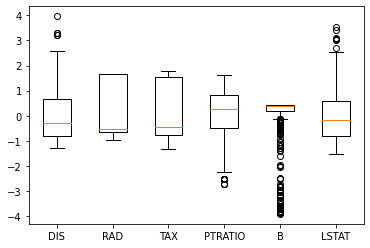

In [118]:
boxplot = plt.boxplot(Xs[:,7:13],labels=labels[7:13])

여기서 CRIM, ZN, B 같은 부분에서 조금 의심스러운 것들이 보이고 DIS, LSAT와 같은 곳에서도 먼가 이상한 것들이 보인다. 이것을 막대 그래프로 바꾸어 보자   
주성분 분석(PCA) : 복잡한 데이터셋을 더적은 차원으로 축소할 수 있는 기술로 데이터셋의 원래 변수의 요약이다. 

In [119]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(Xs)
C = pca.transform(Xs)
print(pca.explained_variance_ratio_)

[0.4713  0.11025 0.09559 0.06597 0.06422 0.05057 0.04118 0.03047 0.0213
 0.01694 0.01431 0.01302 0.00489]


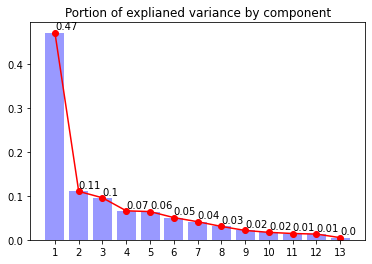

In [120]:
import numpy as np
import matplotlib.pyplot as plt
explained_variance = pca.explained_variance_ratio_
plt.title('Portion of explianed variance by component')
range_ = [r+1 for r in range(len(explained_variance))]
plt.bar(range_,explained_variance,color='b',alpha=0.4,align="center")
plt.plot(range_,explained_variance,'ro-')
for pos,pct in enumerate(explained_variance) : 
    plt.annotate(str(round(pct,2)), (pos+1,pct+0.007))
plt.xticks(range_)
plt.show()

위를 통해 첫번째 차원은 데이터셋 정보의 47%, 두번쨰는 11%, 세번째는 9.5%라는 것을 설명할 수 있다. 이제 해야할 일은 두번째 세번째에 대해 첫번째 차원을 플롯하고, 중심으로 부터 떨어져 있는 고립된 점을 찾는 것이다.

Text(0, 0.5, 'Dimentsion 2')

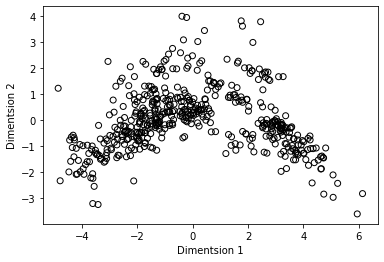

In [121]:
scatter = plt.scatter(C[:,0], C[:,1], facecolors='none', edgecolors='black')
plt.xlabel('Dimentsion 1')
plt.ylabel('Dimentsion 2')

Text(0, 0.5, 'Dimentsion 3')

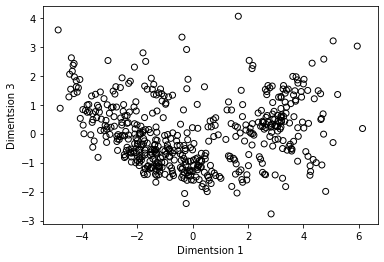

In [122]:
scatter = plt.scatter(C[:,0], C[:,2], facecolors='none', edgecolors='black')
plt.xlabel('Dimentsion 1')
plt.ylabel('Dimentsion 3')

이를 제거하거나 교체 할수 있을 것이다.

chapter5